# Fandango Movie Rating Analysis

Movie rating site called Fandango contains ratings for differente movies, but a discrepancy was noticed between the rating contained in the HTML of the web page, and in the rating that is actually displayed on the site. After this was brought to the public attention, people behind Fandango promised to fix this issue. In this project we will explore Fandango ratings to try to see if the fix was really implemented.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fan_score = pd.read_csv("fandango_score_comparison.csv")
mov_ratings = pd.read_csv("movie_ratings_16_17.csv")

In [3]:
fan_score.head()

FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70           4.3         ...                3.90            3.5   
1     4.25           4.0         ...                3.55            4.5   
2     4.00           4.5         ...                3.90            4.0   
3     0.90           4.2         ...                2.70            1.0   
4     0.70           1.4         ...                2.55            0.5   

   RT_user_norm_round  Metacritic_norm_round  Metacritic_user_norm_round  \
0                 4.5                    3.5                         3.5   
1                 4.0                    3.5                         4.0   
2                 4.5                    3.0                         4.0   
3                 4.0                    1.0                         2.5   
4                 1.5                    1.5                         1.5   

   IMDB_norm_round  Metacritic_user_vote_count  IMDB_user_vote_count  \
0              4.0                        1330                271107   
1              3.5                         249                 65709   
2              4.0                         627                103660   
3              2.5                          31                  3136   
4              2.5                          88                 19560   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  

[5 rows x 22 columns]

In [4]:
mov_ratings.head()

movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2        2.0          2.5  
3        1.5          4.0  
4        3.5          3.0

In [5]:
history_fan_rate = fan_score[['FILM', 'Fandango_Stars', 
                              'Fandango_Ratingvalue', 'Fandango_votes', 
                              'Fandango_Difference']]

In [6]:
current_fan_rate = mov_ratings[['movie', 'year', 'fandango']]

In [12]:
history_fan_rate.head()

FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5

In [13]:
current_fan_rate.head()

movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0

In the following analysis we will compare the Fandango ratings of movies in 2015, before the accusations of an unfair rating system, and in 2016, after the accusations were made. We will only consider the popular movies with more than 30 votes determining the rating.

In [14]:
(history_fan_rate["Fandango_votes"] < 30).sum()

0

In [20]:
mask = history_fan_rate["FILM"].apply(lambda x: "2015" in x)

In [21]:
movies_2015 = history_fan_rate[mask]

In [23]:
movies_2016 = current_fan_rate[current_fan_rate["year"] == 2016]

([<matplotlib.axis.XTick at 0x7fec549c61d0>,
 <a list of 11 Text xticklabel objects>)

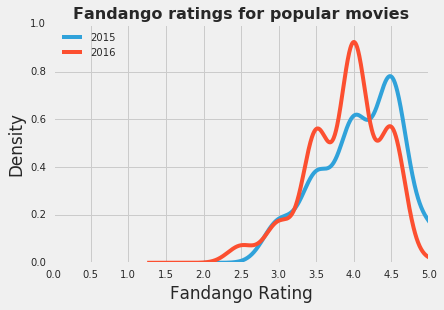

In [50]:
plt.style.use('fivethirtyeight')
movies_2015["Fandango_Stars"].plot.kde(label="2015")
movies_2016["fandango"].plot.kde(label = "2016")
plt.title("Fandango ratings for popular movies", fontsize=16,
         fontweight="bold")
plt.legend(loc="upper left")
plt.xlabel("Fandango Rating")
plt.ylabel("Density")
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

Shape of each distribution is similar and it is left skewed. Highest density in 2015 corresponds to higher ratings compared to the highest density for 2016, so we can conclude that there is indeed a difference in ratings for popular movies in 2015 and 2016. In 2016 the rating distribution is shifted more towards lower rating values compared to 2015. 

In [60]:
(movies_2015["Fandango_Stars"].value_counts(normalize=True)
                              .sort_index(ascending=False) * 100)

5.0     6.976744
4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
Name: Fandango_Stars, dtype: float64

In [62]:
(movies_2016["fandango"].value_counts(normalize=True)
                        .sort_index(ascending=False) * 100)

5.0     0.523560
4.5    24.607330
4.0    40.314136
3.5    24.083770
3.0     7.329843
2.5     3.141361
Name: fandango, dtype: float64

Looking at the frequency distribution tables we arrive at the same conclusions as with the kernel density plots, there is indeed a move towards lower rating values in 2016.

In [80]:
mean_2015 = movies_2015["Fandango_Stars"].mean()
median_2015 = movies_2015["Fandango_Stars"].median()
mode_2015 = movies_2015["Fandango_Stars"].mode()[0]

In [81]:
mean_2016 = movies_2016["fandango"].mean()
median_2016 = movies_2016["fandango"].median()
mode_2016 = movies_2016["fandango"].mode()[0]

In [92]:
statistics_2015 = (mean_2015, median_2015, mode_2015)
statistics_2016 = (mean_2016, median_2016, mode_2016)

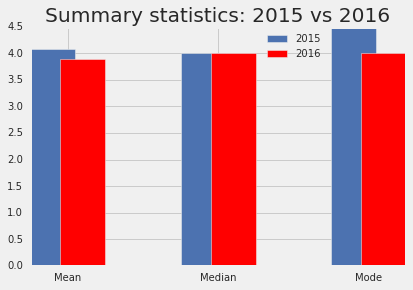

In [129]:
fig, ax = plt.subplots()

x = np.arange(3)
width = 0.3

ax.bar(x, statistics_2015, width, label="2015")
ax.bar(x + width - 0.1, statistics_2016, width, color="red", label="2016")
ax.set_title("Summary statistics: 2015 vs 2016")
ax.set_xticks(x+width - 0.05)
ax.set_xticklabels(["Mean", "Median", "Mode"])
ax.legend(loc=(0.62, 0.85))

After observing the density plots, frequency tables and calculating the summary statistics, we can indeed conclude that there was a shift in rating values towards lower numbers, indicating that the promi